In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [51]:
# data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/recruit_frac_df.csv')

# # only keep hippocampal events
# idx <- data$area == 'cortex'
# data = data[!idx,]

# # data = data[data$n_cells >= 10,]
# # to be consistent with participation_prob, we restrict to sessions with >= 50 ripples
# data = data[data$n_ripples >= 50,]

# data$group = factor(data$group, levels=c('control', 'pae'))
# data$rat = factor(data$rat)
# data$session = factor(data$session)
# data$area = factor(data$area, levels=c('ca1', 'ca3'))

# summary(data)

       X                            session           rat           group     
 Min.   :   89   LEM3246_S20190629164240:  983   LEM3216:7258   control:8860  
 1st Qu.: 6399   LEM3246_S20190701153855:  978   LEM3246:3991   pae    :8697  
 Median :11404   LEM3216_S20190805141510:  824   LEM3124:2680                 
 Mean   :10993   LEM3216_S20190718101925:  698   LEM3206:1904                 
 3rd Qu.:15793   LEM3216_S20190720145517:  577   LEM3116:1238                 
 Max.   :20628   LEM3216_S20190723165548:  518   LEM3120: 287                 
                 (Other)                :12979   (Other): 199                 
  area        recruit_frac      n_ripples        n_cells      
 ca1: 4772   Min.   :0.0000   Min.   : 51.0   Min.   :  1.00  
 ca3:12785   1st Qu.:0.2617   1st Qu.:114.0   1st Qu.: 23.00  
             Median :0.3636   Median :322.0   Median : 49.00  
             Mean   :0.3974   Mean   :371.4   Mean   : 50.33  
             3rd Qu.:0.5185   3rd Qu.:518.0   3rd Qu.

In [ ]:
# options(repr.plot.width = 6, repr.plot.height = 3)

# ggplot(data, aes(x=recruit_frac, color=group)) +
#     geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
#     geom_density() +
#     facet_grid(area ~ .)
 

In [ ]:
# weighted.mean(data[data$area=='ca1' & data$group=='control',]$recruit_frac,
#               data[data$area=='ca1' & data$group=='control',]$n_cells)

# weighted.mean(data[data$area=='ca1' & data$group=='pae',]$recruit_frac,
#               data[data$area=='ca1' & data$group=='pae',]$n_cells)

# m1 = glmer(recruit_frac ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca1',],family="binomial")
# m1.null = glmer(recruit_frac ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca1',],family="binomial")

# anova(m1.null, m1)  

# summary(m1)
# # overdisp.glmer(m1)

# options(repr.plot.width = 4, repr.plot.height = 4)

# plot(m1)
# qqnorm(resid(m1))
# qqline(resid(m1))
# plot(density(resid(m1)))

# plot(recruit_frac ~ group, data = data[data$area == "ca1",])



In [ ]:
# weighted.mean(data[data$area=='ca3' & data$group=='control',]$recruit_frac,
#               data[data$area=='ca3' & data$group=='control',]$n_cells)

# weighted.mean(data[data$area=='ca3' & data$group=='pae',]$recruit_frac,
#               data[data$area=='ca3' & data$group=='pae',]$n_cells)

# m1 = glmer(recruit_frac ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca3',],family="binomial")
# m1.null = glmer(recruit_frac ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca3',],family="binomial")

# anova(m1.null, m1)  

# summary(m1)
# # overdisp.glmer(m1)

# options(repr.plot.width = 4, repr.plot.height = 4)

# plot(m1)
# qqnorm(resid(m1))
# qqline(resid(m1))
# plot(density(resid(m1)))

# plot(recruit_frac ~ group, data = data[data$area == "ca3",])



# compare recruitment fraction 

In [143]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/recruit_frac_df_v2.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]
data = data[data$n_cells > 1,]

# To be consistent with participation_prob, we restrict to sessions with >= 50 ripples
data = data[data$n_ripples >= 50,]

data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X                            session           rat       
 Min.   :  178   LEM3246_S20190629164240: 1966   LEM3216:10531  
 1st Qu.:11436   LEM3246_S20190701153855: 1956   LEM3246: 7982  
 Median :20649   LEM3216_S20190718101925: 1396   LEM3124: 4904  
 Mean   :20500   LEM3216_S20190720145517: 1154   LEM3206: 3808  
 3rd Qu.:30583   LEM3116_S20180717110938:  876   LEM3116: 2370  
 Max.   :38897   LEM3216_S20190805141510:  824   LEM3120:  574  
                 (Other)                :22318   (Other):  321  
     group        area        recruit_frac      n_ripples        n_cells    
 control:13552   ca1: 8387   Min.   :0.0000   Min.   : 51.0   Min.   : 2.0  
 pae    :16938   ca3:22103   1st Qu.:0.2222   1st Qu.:107.0   1st Qu.:16.0  
                             Median :0.3485   Median :313.0   Median :26.0  
                             Mean   :0.3743   Mean   :367.4   Mean   :28.9  
                             3rd Qu.:0.5000   3rd Qu.:518.0   3rd Qu.:32.0  
                  

[1] 0.4072769

[1] 0.2632384

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,32264.88,32277.72,-16130.44,32260.88,NA,NA,NA
m1,3,32255.98,32275.25,-16124.99,32249.98,10.89485,1,0.0009643189


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: recruit_frac ~ group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
 32256.0  32275.2 -16125.0  32250.0     4541 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.1791 -1.0741 -0.0981  1.0186  7.9122 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.1918   0.4379  
Number of obs: 4544, groups:  session, 25

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3387     0.1465  -2.312 0.020780 *  
grouppae     -0.6856     0.1842  -3.722 0.000198 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.795

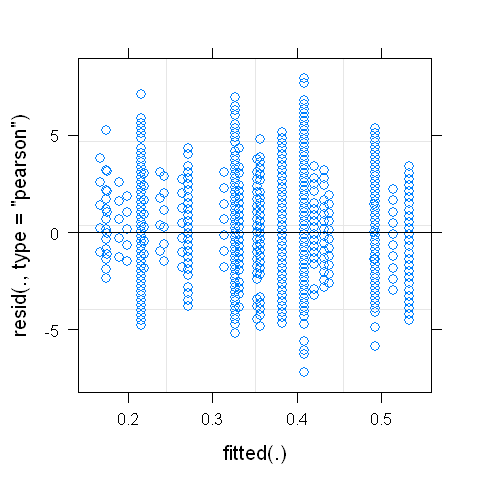

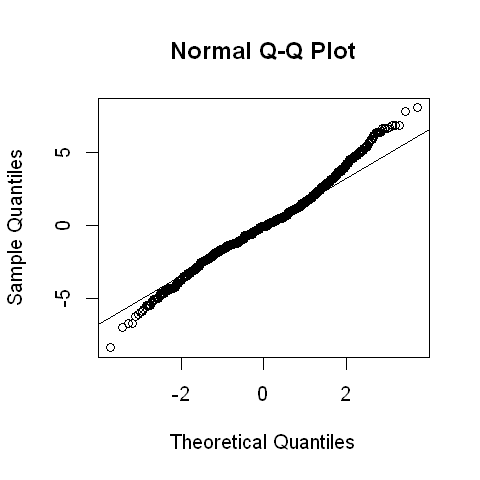

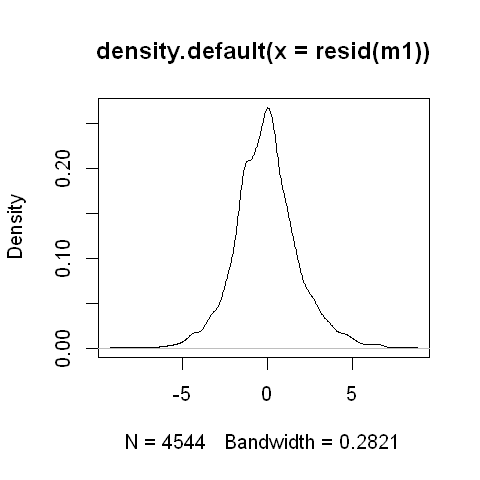

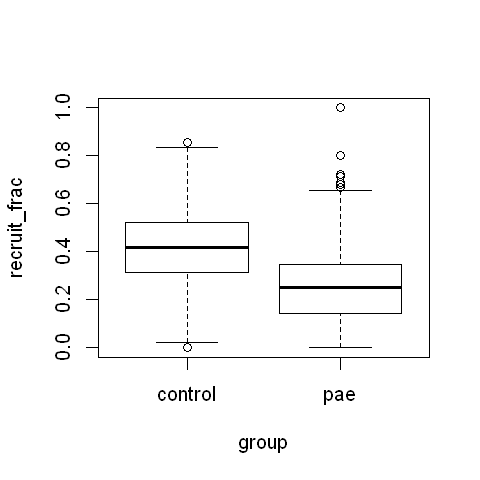

In [139]:
weighted.mean(data[data$area=='ca1' & data$group=='control' & data$cell_type=='pyr',]$recruit_frac,
              data[data$area=='ca1' & data$group=='control' & data$cell_type=='pyr',]$n_cells)

weighted.mean(data[data$area=='ca1' & data$group=='pae' & data$cell_type=='pyr',]$recruit_frac,
              data[data$area=='ca1' & data$group=='pae' & data$cell_type=='pyr',]$n_cells)

m1 = glmer(recruit_frac ~ group + (1|session), weights=n_cells, data=data[data$area=='ca1' & data$cell_type=='pyr',],family="binomial")
m1.null = glmer(recruit_frac ~ 1 + (1|session), weights=n_cells, data=data[data$area=='ca1' & data$cell_type=='pyr',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(recruit_frac ~ group, data = data[data$area == "ca1" & data$cell_type=='pyr',])



[1] 0.4902713

[1] 0.3351228

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,71559.50,71581.87,-35776.75,71553.50,NA,NA,NA
m1,4,71559.65,71589.48,-35775.83,71551.65,1.845056,1,0.1743595


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: recruit_frac ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
 71559.7  71589.5 -35775.8  71551.7    12781 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5841 -0.8524 -0.0360  0.8818  7.3757 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1415   0.3761  
 rat         (Intercept) 0.1544   0.3929  
Number of obs: 12785, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.2964     0.2571  -1.153    0.249
grouppae     -0.5128     0.3486  -1.471    0.141

Correlation of Fixed Effects:
         (Intr)
grouppae -0.739

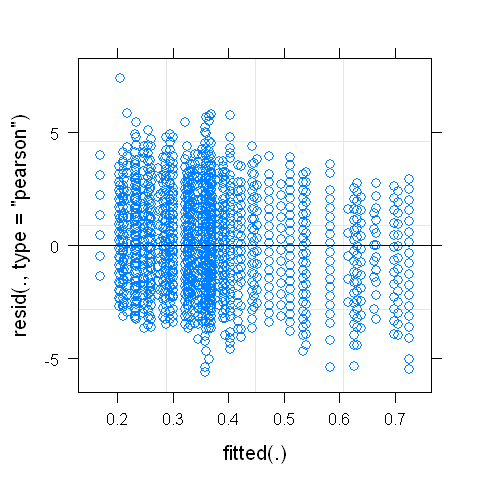

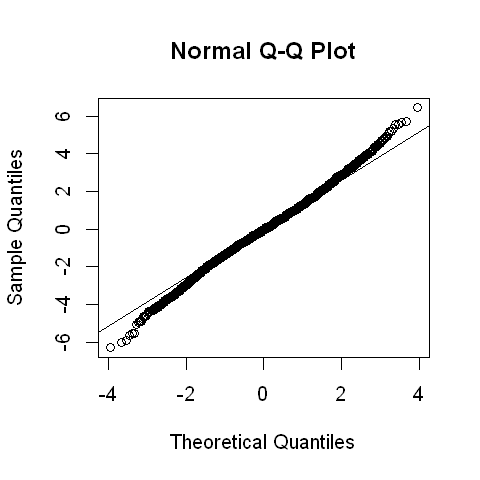

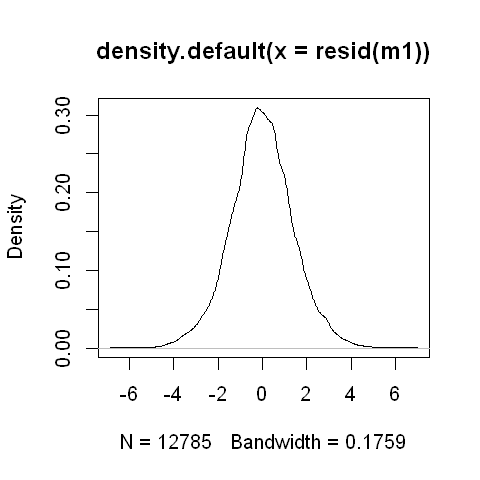

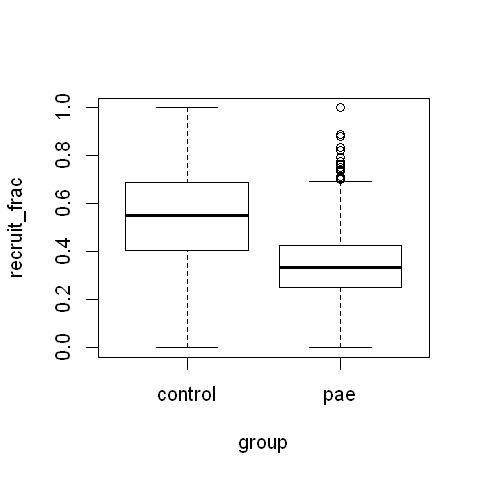

In [140]:
weighted.mean(data[data$area=='ca3' & data$group=='control' & data$cell_type=='pyr',]$recruit_frac,
              data[data$area=='ca3' & data$group=='control' & data$cell_type=='pyr',]$n_cells)

weighted.mean(data[data$area=='ca3' & data$group=='pae' & data$cell_type=='pyr',]$recruit_frac,
              data[data$area=='ca3' & data$group=='pae' & data$cell_type=='pyr',]$n_cells)

m1 = glmer(recruit_frac ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca3' & data$cell_type=='pyr',],family="binomial")
m1.null = glmer(recruit_frac ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca3' & data$cell_type=='pyr',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(recruit_frac ~ group, data = data[data$area == "ca3" & data$cell_type=='pyr',])



[1] 0.3090488

[1] 0.2449408

[1] 0.3090488

[1] 0.2449408

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,16456.63,16469.14,-8226.317,16452.63,NA,NA,NA
m1,3,16454.17,16472.93,-8224.085,16448.17,4.462822,1,0.03464022


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: recruit_frac_trans ~ group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
 16454.2  16472.9  -8224.1  16448.2     3840 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2758 -0.7388 -0.2533  0.7421  5.5528 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.5927   0.7698  
Number of obs: 3843, groups:  session, 22

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.7639     0.3147  -2.427   0.0152 *
grouppae     -0.8225     0.3714  -2.215   0.0268 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.847

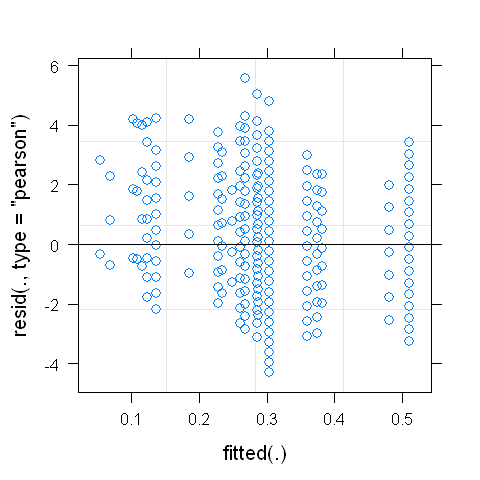

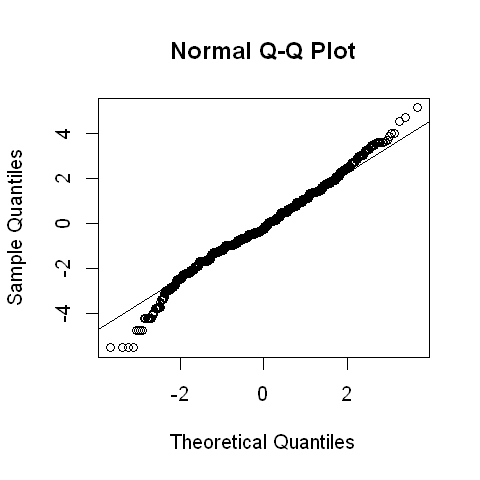

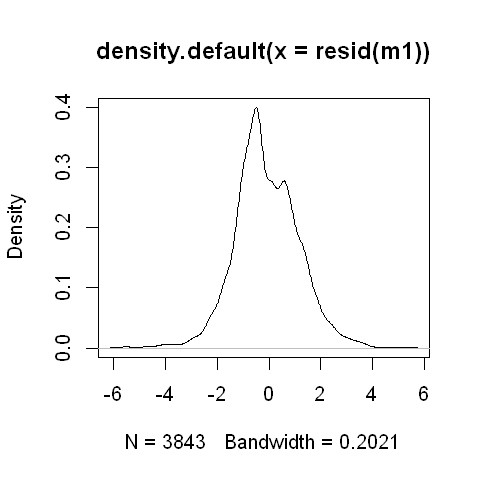

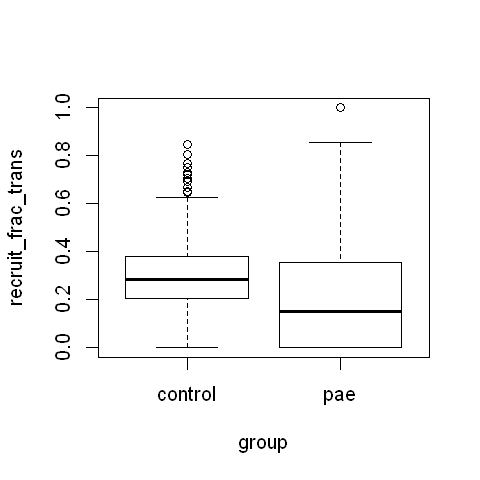

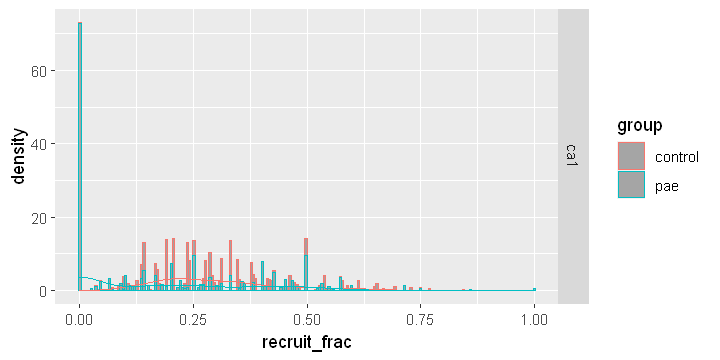

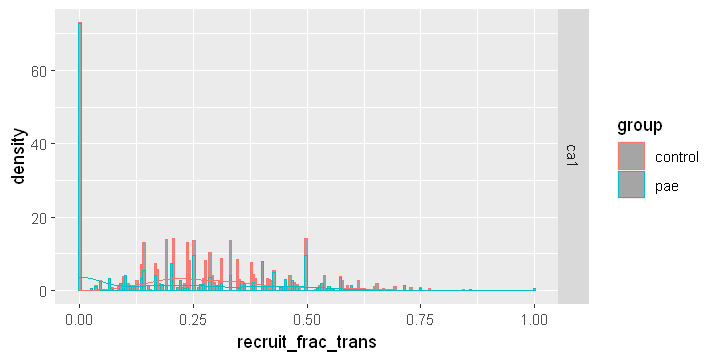

In [141]:


weighted.mean(data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$recruit_frac,
              data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$n_cells)

weighted.mean(data[data$area=='ca1' & data$group=='pae' & data$cell_type=='int',]$recruit_frac,
              data[data$area=='ca1' & data$group=='pae' & data$cell_type=='int',]$n_cells)


# data$recruit_frac_trans = data$recruit_frac+.5
# m1 = lm(recruit_frac_trans ~ group, data = data[data$cell_type == "int" & data$area == "ca1",])
# result = boxcox(m1, lambda = seq(-5,5,0.5))
# lambda = result$x[which.max(result$y)]
# data$recruit_frac_trans = data$recruit_frac_trans^lambda
data$recruit_frac_trans = (data$recruit_frac)


weighted.mean(data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$recruit_frac_trans,
              data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$n_cells)

weighted.mean(data[data$area=='ca1' & data$group=='pae' & data$cell_type=='int',]$recruit_frac_trans,
              data[data$area=='ca1' & data$group=='pae' & data$cell_type=='int',]$n_cells)

m1 = glmer(recruit_frac_trans ~ group + (1|session), weights=n_cells, data=data[data$area=='ca1' & data$cell_type=='int',],family="binomial")
m1.null = glmer(recruit_frac_trans ~ 1 + (1|session), weights=n_cells, data=data[data$area=='ca1' & data$cell_type=='int',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(recruit_frac_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='int',])

# hist(data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$recruit_frac,200)

# hist(data[data$area=='ca1' & data$group=='control' & data$cell_type=='int',]$recruit_frac_trans,200)

options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data[data$area=='ca1' & data$cell_type=='int',], aes(x=recruit_frac, color=group)) +
    geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
    geom_density() +
    facet_grid(area ~ .)

ggplot(data[data$area=='ca1' & data$cell_type=='int',], aes(x=recruit_frac_trans, color=group)) +
    geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
    geom_density() +
    facet_grid(area ~ .)

[1] 0.3911048

[1] 0.269043

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,37160.86,37182.28,-18577.43,37154.86,NA,NA,NA
m1,4,37161.34,37189.90,-18576.67,37153.34,1.517291,1,0.2180299


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: recruit_frac ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]
Weights: n_cells

     AIC      BIC   logLik deviance df.resid 
 37161.3  37189.9 -18576.7  37153.3     9314 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.5848 -0.7588 -0.0279  0.6076  5.2952 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.302    0.5495  
 rat         (Intercept) 0.559    0.7477  
Number of obs: 9318, groups:  session:rat, 58; rat, 6

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.006387   0.466411  -0.014    0.989
grouppae    -0.864787   0.627863  -1.377    0.168

Correlation of Fixed Effects:
         (Intr)
grouppae -0.723

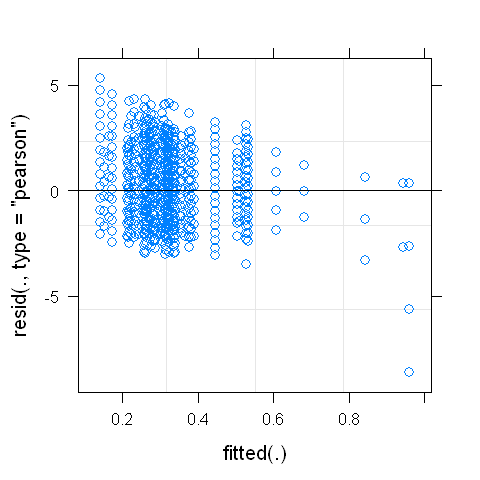

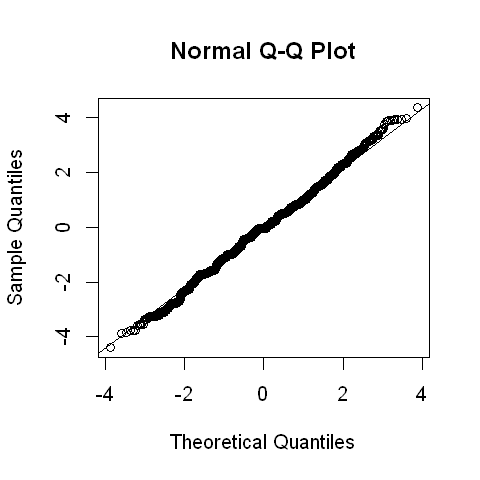

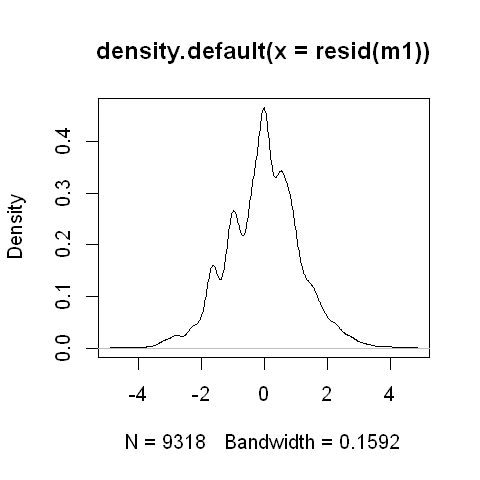

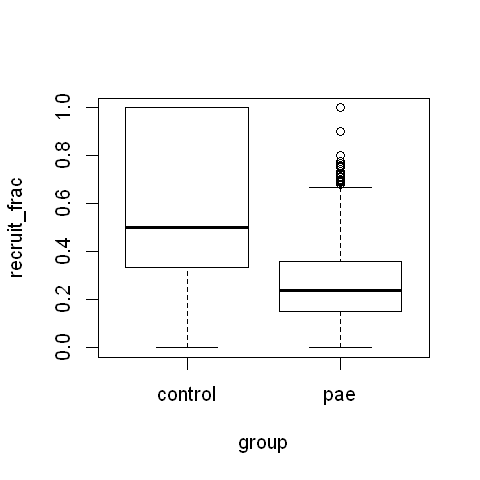

In [142]:
weighted.mean(data[data$area=='ca3' & data$group=='control' & data$cell_type=='int',]$recruit_frac,
              data[data$area=='ca3' & data$group=='control' & data$cell_type=='int',]$n_cells)

weighted.mean(data[data$area=='ca3' & data$group=='pae' & data$cell_type=='int',]$recruit_frac,
              data[data$area=='ca3' & data$group=='pae' & data$cell_type=='int',]$n_cells)

m1 = glmer(recruit_frac ~ group + (1|rat/session), weights=n_cells, data=data[data$area=='ca3' & data$cell_type=='int',],family="binomial")
m1.null = glmer(recruit_frac ~ 1 + (1|rat/session), weights=n_cells, data=data[data$area=='ca3' & data$cell_type=='int',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(recruit_frac ~ group, data = data[data$area == "ca3" & data$cell_type=='int',])



In [112]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/recruit_frac_df_part_prob.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]

# To be consistent with participation_prob, we restrict to sessions with >= 50 ripples
data = data[data$n_ripples >= 50,]
data = data[data$n_spikes >= 100,]

data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X                           session          rat           group     
 Min.   :  75   LEM3124_S20190302163218: 134   LEM3206:1211   control:1471  
 1st Qu.:2031   LEM3206_S20190719140644: 119   LEM3124:1029   pae    :3146  
 Median :3917   LEM3206_S20190718143924: 118   LEM3246: 805                 
 Mean   :3857   LEM3206_S20190717140525: 117   LEM3216: 723                 
 3rd Qu.:5887   LEM3206_S20190720132154: 113   LEM3116: 631                 
 Max.   :8225   LEM3216_S20190718101925: 113   LEM3120: 109                 
                (Other)                :3903   (Other): 109                 
  area      participation_prob   n_ripples        n_cells         n_spikes     
 ca1:1128   Min.   :0.0000     Min.   : 51.0   Min.   : 1.00   Min.   :   101  
 ca3:3489   1st Qu.:0.1111     1st Qu.: 79.0   1st Qu.:23.00   1st Qu.:  1680  
            Median :0.2542     Median :108.0   Median :36.00   Median :  4666  
            Mean   :0.3389     Mean   :191.4   Mean   :41.27   M

[1] 0.4072769

[1] 0.2654161

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,68886.91,68896.28,-34441.46,68882.91,NA,NA,NA
m1,3,68884.81,68898.86,-34439.41,68878.81,4.101725,1,0.04283948


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob ~ group + (1 | session)
   Data: data[data$area == area & data$cell_type == cell_type, ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 68884.8  68898.9 -34439.4  68878.8      795 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-21.222  -4.972  -1.183   4.358  31.534 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.3459   0.5881  
Number of obs: 798, groups:  session, 27

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.3396     0.1964  -1.729   0.0838 .
grouppae     -0.5127     0.2417  -2.121   0.0339 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.813

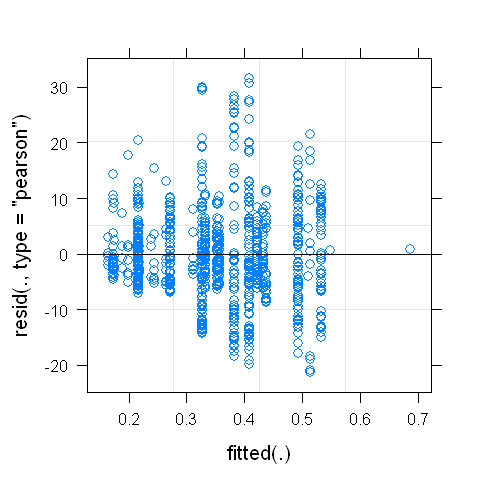

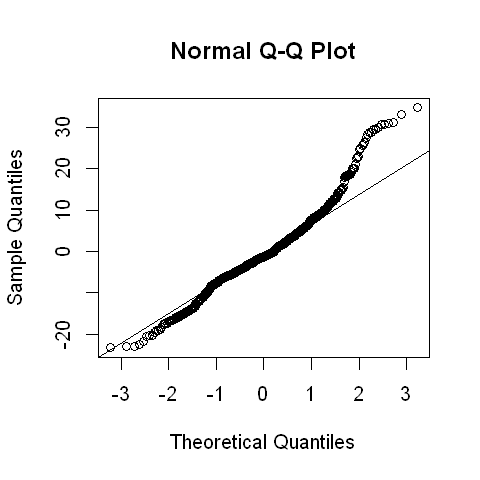

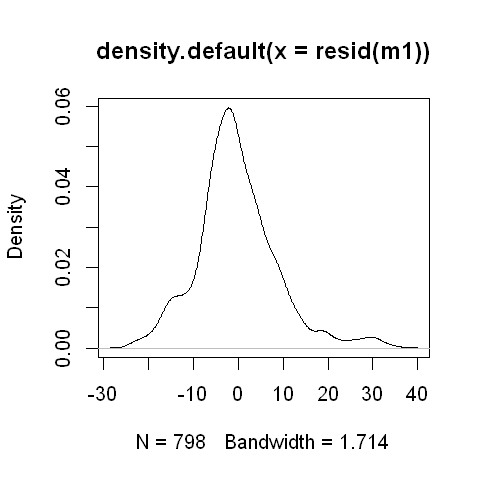

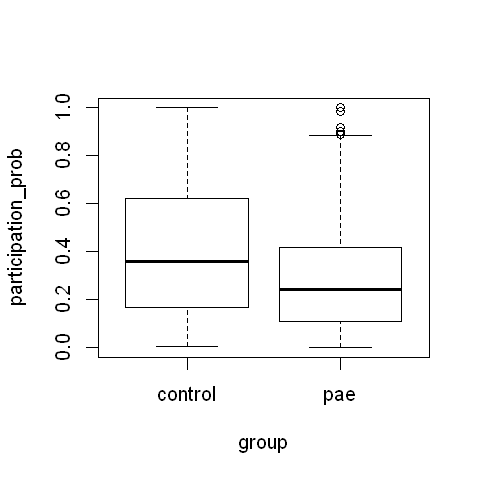

In [113]:
area = 'ca1'
cell_type = 'pyr'

weighted.mean(data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$n_ripples)

weighted.mean(data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$n_ripples)

m1 = glmer(participation_prob ~ group + (1|session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")
m1.null = glmer(participation_prob ~ 1 + (1|session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(participation_prob ~ group, data = data[data$area == area & data$cell_type==cell_type,])



[1] 0.4902713

[1] 0.3351228

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,171220.9,171238.3,-85607.47,171214.9,NA,NA,NA
m1,4,171221.1,171244.3,-85606.54,171213.1,1.845056,1,0.1743595


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob ~ group + (1 | rat/session)
   Data: data[data$area == area & data$cell_type == cell_type, ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
171221.1 171244.3 -85606.5 171213.1     2416 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-28.054  -4.391  -1.460   4.135  36.816 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1415   0.3761  
 rat         (Intercept) 0.1544   0.3929  
Number of obs: 2420, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.2964     0.2566  -1.155    0.248
grouppae     -0.5128     0.3474  -1.476    0.140

Correlation of Fixed Effects:
         (Intr)
grouppae -0.739

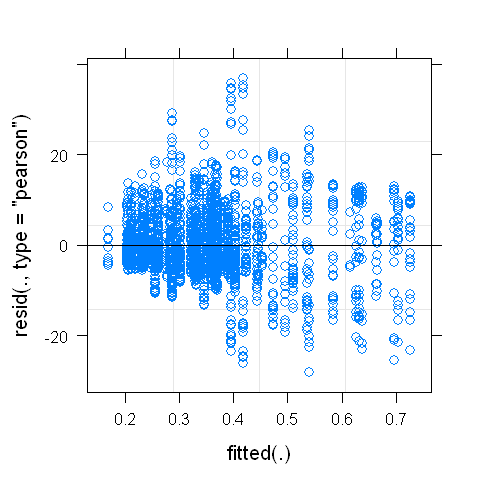

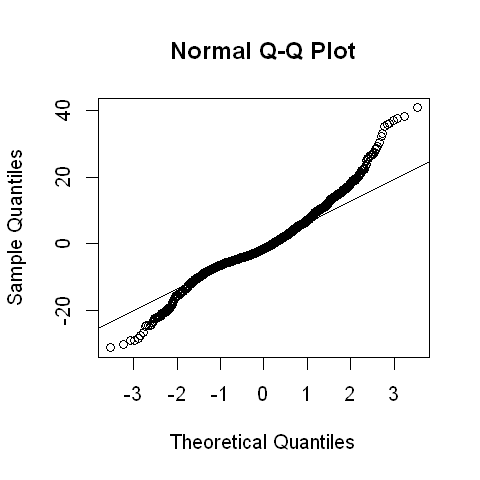

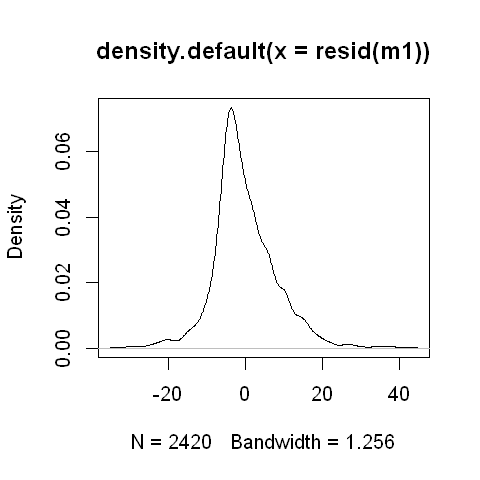

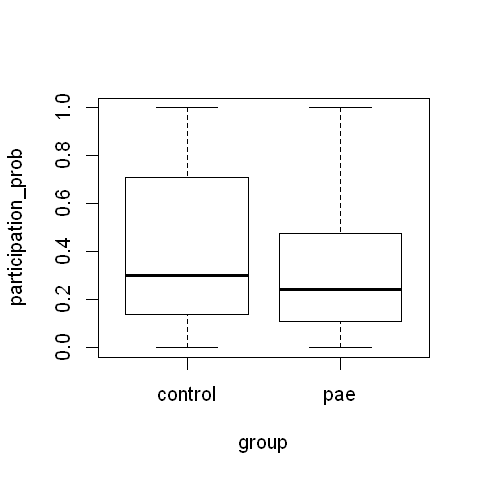

In [114]:
area = 'ca3'
cell_type = 'pyr'

weighted.mean(data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$n_ripples)

weighted.mean(data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$n_ripples)

m1 = glmer(participation_prob ~ group + (1|rat/session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")
m1.null = glmer(participation_prob ~ 1 + (1|rat/session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(participation_prob ~ group, data = data[data$area == area & data$cell_type==cell_type,])



[1] 0.2465561

[1] 0.2020192

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,17119.97,17127.57,-8557.987,17115.97,NA,NA,NA
m1,3,17117.92,17129.32,-8555.961,17111.92,4.051982,1,0.04411951


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | session)
   Data: data[data$area == area & data$cell_type == cell_type, ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 17117.9  17129.3  -8556.0  17111.9      327 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-13.322  -4.112  -1.343   3.532  31.604 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.5881   0.7669  
Number of obs: 330, groups:  session, 25

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0059     0.2734  -3.679 0.000234 ***
grouppae     -0.6949     0.3335  -2.084 0.037194 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.820

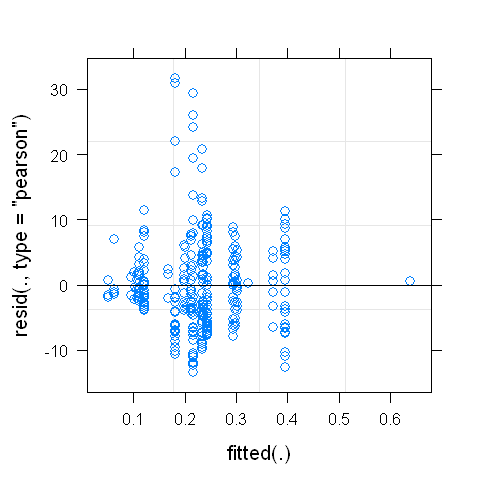

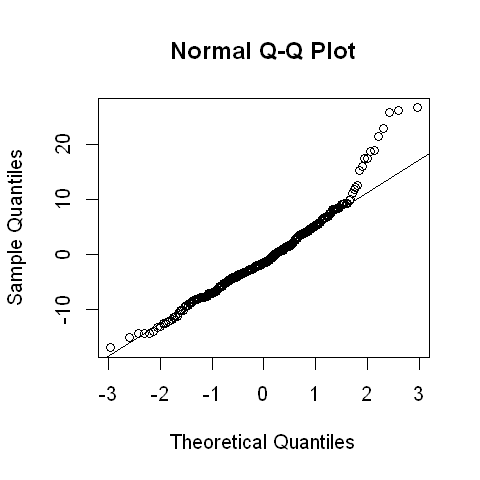

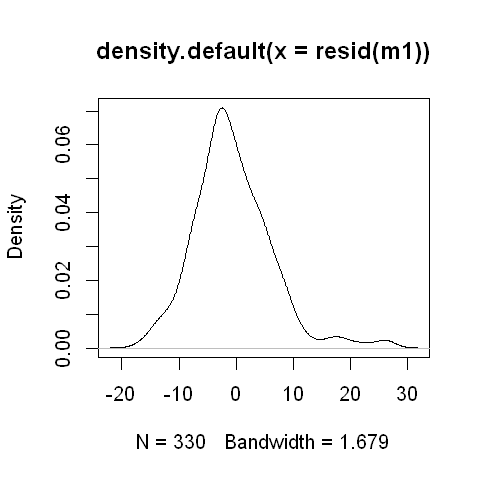

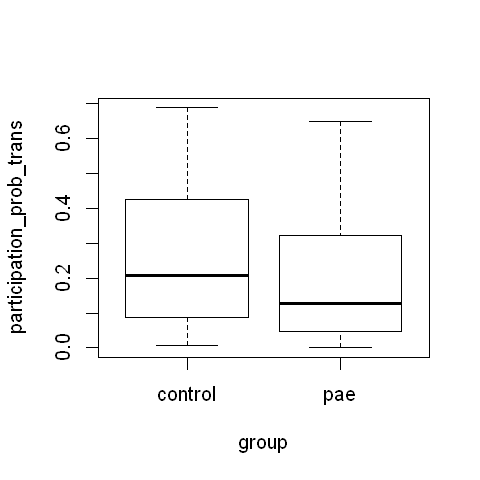

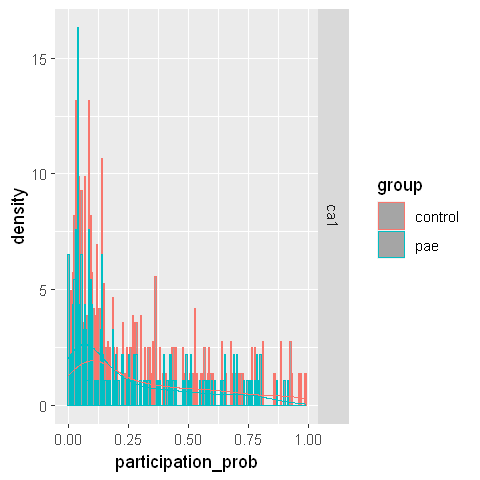

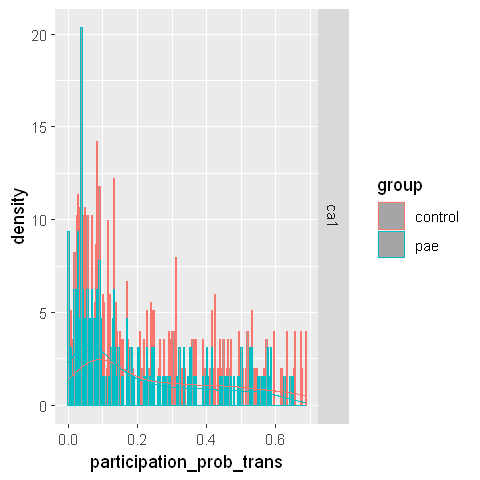

In [124]:
area = 'ca1'
cell_type = 'int'

data$participation_prob_trans = data$participation_prob+1

# m1 = lm(participation_prob_trans ~ group, data = data[data$cell_type == "int" & data$area == "ca1",])
# result = boxcox(m1, lambda = seq(-5,5,0.5))
# lambda = result$x[which.max(result$y)]
# data$participation_prob_trans = data$participation_prob_trans^lambda

data$participation_prob_trans = log(data$participation_prob+1)

weighted.mean(data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$participation_prob_trans,
              data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$n_ripples)

weighted.mean(data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$participation_prob_trans,
              data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$n_ripples)

m1 = glmer(participation_prob_trans ~ group + (1|session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1|session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(participation_prob_trans ~ group, data = data[data$area == area & data$cell_type==cell_type,])

ggplot(data[data$area=='ca1' & data$cell_type==cell_type,], aes(x=participation_prob, color=group)) +
    geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
    geom_density() +
    facet_grid(area ~ .)

ggplot(data[data$area=='ca1' & data$cell_type==cell_type,], aes(x=participation_prob_trans, color=group)) +
    geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
    geom_density() +
    facet_grid(area ~ .)


[1] 0.4219588

[1] 0.269043

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,34627.91,34642.83,-17310.95,34621.91,NA,NA,NA
m1,4,34628.33,34648.23,-17310.16,34620.33,1.581794,1,0.2085024


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | rat/session)
   Data: data[data$area == area & data$cell_type == cell_type, ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 34628.3  34648.2 -17310.2  34620.3     1065 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-17.5405  -3.5604  -0.9555   3.0104  26.5526 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1359   0.3686  
 rat         (Intercept) 0.1683   0.4103  
Number of obs: 1069, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.6529     0.2682  -2.434   0.0149 *
grouppae     -0.4978     0.3623  -1.374   0.1694  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.740

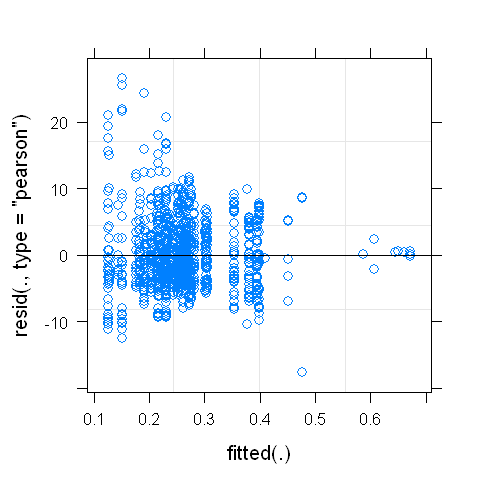

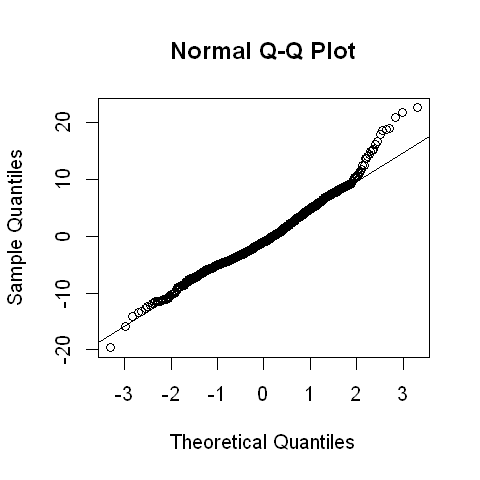

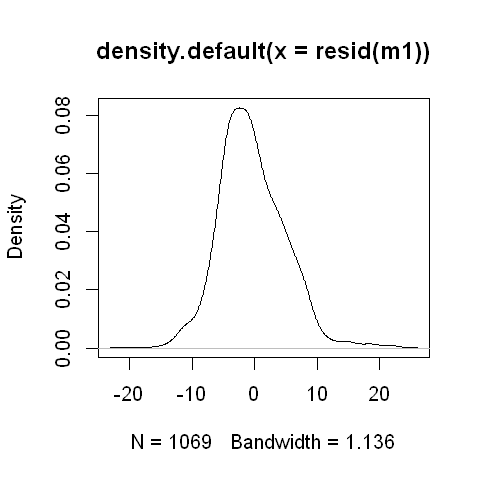

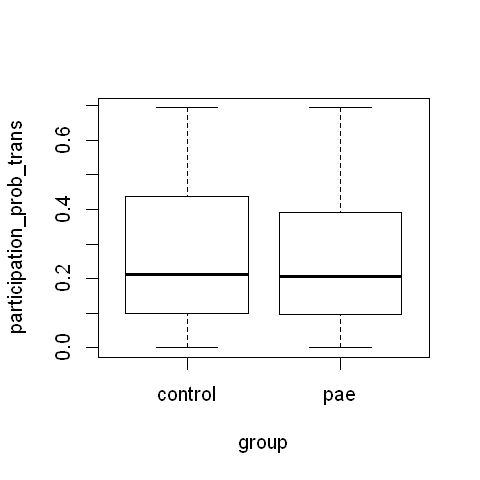

In [125]:
area = 'ca3'
cell_type = 'int'

data$participation_prob_trans = log(data$participation_prob+1)


weighted.mean(data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='control' & data$cell_type==cell_type,]$n_ripples)

weighted.mean(data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$participation_prob,
              data[data$area==area & data$group=='pae' & data$cell_type==cell_type,]$n_ripples)

m1 = glmer(participation_prob_trans ~ group + (1|rat/session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1|rat/session), weights=n_ripples, data=data[data$area==area & data$cell_type==cell_type,],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(participation_prob_trans ~ group, data = data[data$area == area & data$cell_type==cell_type,])

